In [1]:
import pandas as pd
import numpy as np
import plotly.express as px


In [2]:
rankings = pd.read_csv('data/fifa_ranking.csv')
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63054 entries, 0 to 63053
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               63054 non-null  int64 
 1   rank             63054 non-null  int64 
 2   country_full     63054 non-null  object
 3   country_abrv     63054 non-null  object
 4   total_points     63054 non-null  int64 
 5   previous_points  63054 non-null  int64 
 6   rank_change      63054 non-null  int64 
 7   confederation    63054 non-null  object
 8   rank_date        63054 non-null  object
dtypes: int64(5), object(4)
memory usage: 4.3+ MB


In [3]:
rankings.head()

,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,43818,82,Iraq,IRQ,15,0,0,AFC,1992-12-31
1,43873,107,Mozambique,MOZ,9,0,0,CAF,1992-12-31
2,43816,108,Indonesia,IDN,9,0,0,AFC,1992-12-31
3,1882218,109,Antigua and Barbuda,ATG,8,0,0,CONCACAF,1992-12-31
4,43820,110,Jordan,JOR,8,0,0,AFC,1992-12-31


In [4]:
#filter the rankings by country Egypt
rankings[rankings['country_full'] == 'Egypt']


,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
90,43855,21,Egypt,EGY,45,0,0,CAF,1992-12-31
241,43855,26,Egypt,EGY,44,45,5,CAF,1993-08-08
415,43855,25,Egypt,EGY,45,44,1,CAF,1993-09-23
583,43855,27,Egypt,EGY,44,45,2,CAF,1993-10-22
755,43855,31,Egypt,EGY,43,44,4,CAF,1993-11-19
...,...,...,...,...,...,...,...,...,...
62129,43855,49,Egypt,EGY,1432,1420,3,CAF,2020-11-26
62339,43855,49,Egypt,EGY,1432,1432,0,CAF,2020-12-10
62551,43855,49,Egypt,EGY,1432,1432,0,CAF,2021-02-18
62717,43855,46,Egypt,EGY,1432,1432,3,CAF,2021-04-07


<AxesSubplot:xlabel='rank_date'>

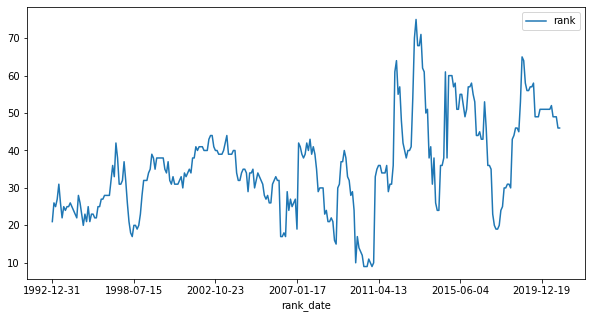

In [5]:

#plot the rankings of Egypt vs rank_date
rankings[rankings['country_full'] == 'Egypt'].plot(x='rank_date', y='rank', figsize=(10,5))

In [6]:
#get the year from the date
rankings['year'] = rankings['rank_date'].apply(lambda x: x[:4])
#get the month from the date
rankings['month'] = rankings['rank_date'].apply(lambda x: x[5:7])

#convert the year to int
rankings['year'] = rankings['year'].astype(int)
#convert the month to int
rankings['month'] = rankings['month'].astype(int)


In [7]:
#get distinct year and month
years_lst = rankings['year'].unique()
countries_lst = rankings['country_full'].unique()
# if year and month didn't exist, then create them and fill the ranking with previous month ranking
country_lst = []
year_lst = []
month_lst = []
rank_lst =  []
missing_rankings = pd.DataFrame(columns = ['year', 'month', 'country_full', 'rank'])
for i in range(1993,2022,1):
    months_lst = rankings[(rankings['year'] == i)]['month'].unique()
    for j in range(1,13,1):
        month = j
        if j not in months_lst:
            for country in countries_lst:
                if j==1:
                    year = i-1
                    month = 12
                else:
                    year = i
                    month = j - 1
                #get rank from year and month and country
                if(i == 1993 and j == 3):
                    rank = 1
                try :
                    rank = rankings[(rankings['year'] == year) & (rankings['month'] == month) & (rankings['country_full'] == country)]['rank'].values[0]
                except:
                    try:
                        rank = missing_rankings[(missing_rankings['year'] == year) & (missing_rankings['month'] == month) & (missing_rankings['country_full'] == country)]['rank'].values[0]
                    except:
                        rank = 200

                #add row
                year_lst.append(i)
                month_lst.append(j)
                country_lst.append(country)
                rank_lst.append(rank)
                missing_rankings = pd.DataFrame({'year':year_lst, 'month':month_lst, 'country_full':country_lst, 'rank':rank_lst})

missing_rankings


,year,month,country_full,rank
0,1993,1,Iraq,82
1,1993,1,Mozambique,107
2,1993,1,Indonesia,108
3,1993,1,Antigua and Barbuda,109
4,1993,1,Jordan,110
...,...,...,...,...
8203,2021,12,Montenegro,64
8204,2021,12,Curaçao,76
8205,2021,12,South Sudan,169
8206,2021,12,Kosovo,120


In [8]:
missing_rankings['rank_date'] = missing_rankings.year.astype(str) + '-' + missing_rankings.month.astype(str) + '-01'
#drop everything except the year, month, country_full and rank
new_rankings = rankings[['year', 'month', 'country_full', 'rank','rank_date']]

#concat missing_ranking and new_rankings
new_rankings = pd.concat([new_rankings, missing_rankings])

new_rankings['rank_date'] = pd.to_datetime(new_rankings['rank_date'])

new_rankings.sort_values(inplace=True, by=['rank_date','rank'])

new_rankings.to_csv('data/fifa_ranking_full.csv')

In [10]:
fig = px.line(new_rankings[new_rankings['country_full'] == 'Brazil'], x='rank_date', y='rank', title='Rankings of Belgium')
#reverse the y axis
fig['layout']['yaxis']['autorange'] = "reversed"
fig.show()
